<h1>Парний t-критерій Стьюдента для незалежних вибірок</h1>

Тарабара Сергій БС-81, КП №7

<strong>Виконання

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import math
import matplotlib.pyplot as plt
from numpy.random import randint

In [37]:
col_1 = randint(0, 30, 12)
col_2 = randint(0, 30, 12)
df = pd.DataFrame({"Група 1": col_1, "Група 2": col_2,
}, index=np.arange(1, len(col_1)+1))
df.index.name = '№ досліду'
df.columns.name = 'Результати'
N = df.shape[0]
df

Результати,Група 1,Група 2
№ досліду,,
1,19,18
2,3,21
3,1,4
4,25,5
5,5,12
6,10,21
7,24,19
8,27,10
9,17,8


[]

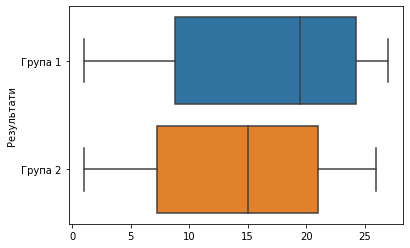

In [38]:
sns.boxplot(data = df, orient = 'h').set()

In [52]:
def Get_sigma(array,n):
    s=0
    mean=(sum(array))/n
    for i in range (n):
        s+=((array[i]-mean))**2
    return s/(n-1)
def Liven(x,y):
    n=len(x)
    m=len(y)
    s1=sd(x,n)
    s2=sd(y,m)
    if s1>s2:
        f=s1/s2
    else:
        f=s2/s1
    print('Отримане значення критерію Лівеня: ' + str(f))
    df1=n-1
    df2=m-1
    print('Значення ступенів свободи: df1 = ' + str(df1) + "; df2 = " + str(df2))
    table = pd.read_excel("Liven_table.xlsx").iloc[df1,df2]
    print("Критичне значення критерію Лівеня: " + str(table))
    if f<table:
        result = "not significant"
    else:
        result = "significant"
    return result

In [53]:
Liven(col_1,col_2)

Отримане значення критерію Лівеня: 1.3375508359692723
Значення ступенів свободи: df1 = 11; df2 = 11
Критичне значення критерію Лівеня: 2.72


'not significant'

In [56]:
def Student(x,y,flag):
    if flag=="significant":
        n=len(x)
        m=len(y)
        s1=sd(x,n)
        s2=sd(y,m)
        m1=sum(x)/n
        m2=sum(y)/n
        df=n+m-2
        t=(abs(m1-m2))/(math.sqrt((s1/n)+(s2/m)))
    elif flag=="not significant":
        n=len(x)
        m=len(y)
        s1=sd(x,n)
        s2=sd(y,m)
        m1=sum(x)/n
        m2=sum(y)/n
        df1=n-1
        df2=m-1
        df=n+m-2
        k=(1/n)+(1/m)
        t=(abs(m1-m2))/(math.sqrt(((df1*s1+df2*s2)/df)*k))
    else:
        return "You input the wrong flag"
    print('Критерій Стьюдента: ' + str(t))
    print('Ступені свободи: ' + str(df))
    table = pd.read_excel("Student_table.xlsx").iloc[df-1,1]
    print("Критичне значення критерію Стьюдента: " + str(table))
    if t<table:
        result = "significant"
    else:
        result = "not significant"
    return result

In [57]:
Student(col_1,col_2, "not significant")

Критерій Стьюдента: 0.7839241156756381
Ступені свободи: 22
Критичне значення критерію Стьюдента: 2.074


'significant'

<strong>Висновок:</strong>
За результатом перевірки даних на рівність дисперсії тестом Лівеня був отриманий результат F < F табличне, тому приймаємо нульову гіпотезу.
В результаті перевірки відмінності між двома групами за допомогою критерію Стюдента для незалежних вибірок був отриманий результат t > t табличне. Отже, відхиляємо нульову гіпотезу та робимо висновок про статичну відмінність середніх.